# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rahmad Ramadhan Laska
- Email: ramadhanlaska11@gmail.com
- Id Dicoding: rmdlaska11

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 :
Bagaimana tren penyewaan sepeda per bulan?

- pertanyaan 2 :
Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

- pertanyaan 3 :
Apakah permintaan sewa sepeda lebih tinggi selama hari kerja atau akhir pekan?

- pertanyaan 4 :
Siapakah kelompok pengguna yang paling banyak memanfaatkan layanan penyewaan sepeda?

- pertanyaan 5 :
Apakah ada pola penggunaan sepeda yang berbeda antara hari kerja dan akhir pekan?

- pertanyaan 6 :
Bagaimana distribusi pelanggan berdasarkan kelompok total penyewaan?

## Menyiapkan semua library yang dibutuhkan

In [65]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Pada tahap ini dilakukan pengumpulan data. Data diunduh kemudian diunggah ke github agar data bisa digunakan.

####Import Dataset Day

In [66]:
# Membaca data dari URL di repositori GitHub
day = pd.read_csv('https://raw.githubusercontent.com/rmdlaska11/Analisis-Data/main/day.csv')

# Menampilkan bentuk (shape) dan lima baris pertama dari data
print(day.shape)
day.head(10)

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Dataset day memiliki 731 baris dengan 16 Kolom

####Import Dataset Hour

In [67]:
hour = pd.read_csv('https://raw.githubusercontent.com/rmdlaska11/Analisis-Data/main/hour.csv')
print(hour.shape)
hour.head(10)

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Dataset hour memiliki 17379 baris dengan 17 kolom

### Assessing Data

Pada tahap ini akan dilakukan pengecekan data apakah ada data yang duplikat atau yang hilang kemudian melihat deskripsi statistiknya.

####Menilai Data hour

In [68]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi diatas dapat dilihat bahwa sepertinya dataset hour tidak memiliki data yang hilang hanya saja terjadi kesalahan yang harus diperbaiki yaitu dteday yang seharusnya memiliki tipe data datetime. Kemudian untuk membuktikan lebih lanjut menggunakan fungsi isnull().

In [69]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Terlihat bahwa dataset hour tidak memiliki data yang hilang.

In [70]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


Dataset ini juga tidak memiliki nilai yang duplikat.

In [71]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil deskripsi tersebut tidak terdapat keanehan.

####Menilai Data day

In [72]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi diatas dataset day juga tidak memiliki data yang hilang hanya saja terjadi kesalahan yang harus diperbaiki yaitu dteday yang seharusnya memiliki tipe data datetime. Untuk membuktikan lebih lanjut apakah ada data hilang menggunakan fungsi isnull.

In [73]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dataset ini terbukti tidak memiliki data yang hilang.

In [74]:
print("Jumlah data duplikat: ", day.duplicated().sum())

Jumlah data duplikat:  0


Dataset ini juga tidak memiliki data yang duplikat.

In [75]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika dilihat dari deskripsi tersebut sepertinya tidak ada kesalahan.

### Cleaning Data
Data yang akan digunakan terbukti tidak harus dibersihkan karena data sudah bersih hanya saja variabel dteday harus diubah ke tipe data datetime.

In [76]:
# Mengubah format dteday menjadi datetime
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [77]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [78]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat bahwa variabel dteday telah diubah ke tipe data datetime.

## Exploratory Data Analysis (EDA)

Pada tahap ini akan dilakukan eksplorasi terhadap data yang akan digunakan dan hasilnya digunakan untuk menjawab 6 pertanyaan yang telah didefinisikan sebelumnya.

####Explor Data hour

In [79]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan infomasi diatas data yang digunakan adalah data penyewaan sepeda selama 2 tahun yaitu tahun 2011-2012

In [80]:
hourly_avg = hour.groupby('hr')['cnt'].mean()
print(hourly_avg)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


Rata-rata penyewaan sepeda per jam menunjukkan pola yang jelas dengan dua puncak utama. Puncak pertama terjadi pada jam-jam berangkat kerja (sekitar pukul 7-8 pagi) dan puncak kedua terjadi pada jam-jam pulang kerja (sekitar pukul 17-18 sore).

In [81]:
weekday_hourly_avg = hour.groupby(['weekday', 'hr'])['cnt'].mean().unstack()
print(weekday_hourly_avg)

hr              0          1          2          3         4          5   \
weekday                                                                    
0        93.990385  77.432692  61.627451  31.144231  9.362745   8.693878   
1        34.009524  17.307692  10.313131   5.113402  5.785714  21.653846   
2        27.623762  12.540000   6.801980   4.152174  5.131313  24.455446   
3        34.557692  15.336538   7.813725   4.888889  4.968750  25.750000   
4        39.271845  17.223301   9.156863   5.071429  5.280000  25.912621   
5        52.432692  24.721154  12.740385   6.598039  6.072165  23.903846   
6        94.304762  67.780952  50.495238  22.885714  7.657143   8.291262   

hr               6           7           8           9   ...          14  \
weekday                                                  ...               
0         14.495146   33.104762   83.857143  156.542857  ...  363.628571   
1         85.865385  248.538462  412.192308  218.442308  ...  192.701923   
2        10

Secara umum, terdapat dua puncak penyewaan sepeda pada hari kerja (Senin-Jumat), yaitu pada jam-jam berangkat dan pulang kerja (sekitar jam 7-9 pagi dan jam 17-19 sore). Hal ini menunjukkan bahwa banyak pengguna yang menggunakan sepeda untuk perjalanan komuter. Pola penyewaan pada akhir pekan (Sabtu-Minggu) berbeda dengan hari kerja. Puncak penyewaan pada akhir pekan terjadi di siang hari (sekitar jam 10-16), menunjukkan bahwa sepeda lebih banyak digunakan untuk kegiatan rekreasi.

In [82]:
user_type_hourly_total = hour.groupby(['hr', 'workingday'])[['casual', 'registered']].sum().reset_index()
print(user_type_hourly_total)

    hr  workingday  casual  registered
0    0           0    3829       17055
1    0           1    3546       14700
2    1           0    2876       13111
3    1           1    1833        6344
4    2           0    2371        9752
5    2           1    1041        3188
6    3           0    1465        4386
7    3           1     428        1895
8    4           0     514        1362
9    4           1     360        2192
10   5           0     383        1546
11   5           1     629       11703
12   6           0     875        3417
13   6           1    2142       48698
14   7           0    1988        8039
15   7           1    6049      138095
16   8           0    4718       19688
17   8           1   11043      225552
18   9           0   10399       29246
19   9           1   12059      107734
20  10           0   18311       40804
21  10           1   15478       51664
22  11           0   24637       48201
23  11           1   18649       59833
24  12           0   2916

Registered users memiliki jumlah penyewaan yang jauh lebih tinggi daripada casual users secara keseluruhan. Pola penyewaan untuk registered users menunjukkan puncak yang jelas pada jam-jam sibuk (7-9 pagi dan 17-19 sore) pada hari kerja, menunjukkan penggunaan untuk perjalanan komuter. Casual users: cenderung menggunakan sepeda untuk tujuan rekreasi atau perjalanan yang lebih fleksibel, dengan pola penyewaan yang lebih tersebar sepanjang hari, terutama pada akhir pekan.

####Explore Data day

In [83]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [84]:
seasonal_avg = day.groupby('season')['cnt'].mean()
print(seasonal_avg)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


Musim gugur (3) memiliki rata-rata penyewaan sepeda tertinggi, diikuti oleh musim panas (2). Hal ini menunjukkan bahwa cuaca yang sejuk dan hangat pada musim-musim tersebut mendorong lebih banyak orang untuk menggunakan sepeda. Musim semi (1) memiliki rata-rata penyewaan sepeda terendah. Meskipun cuaca mulai membaik di musim semi, mungkin masih ada beberapa faktor yang membuat orang enggan bersepeda, seperti sisa musim dingin atau alergi musim semi.

In [85]:
day_type_total = day.groupby('workingday')['cnt'].sum()
print(day_type_total)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


Total penyewaan sepeda lebih tinggi pada hari kerja (workingday = 1) dibandingkan dengan akhir pekan/hari libur (workingday = 0). Sebagian besar penyewaan sepeda terjadi pada hari kerja, menunjukkan bahwa layanan ini banyak digunakan untuk perjalanan komuter atau kegiatan sehari-hari lainnya.

In [86]:
monthly_rentals = day.groupby('mnth')['cnt'].sum()
print(monthly_rentals)

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


Terdapat pola musiman yang jelas dalam total penyewaan sepeda berdasarkan bulan. Penyewaan cenderung meningkat dari bulan-bulan awal tahun hingga mencapai puncaknya di pertengahan tahun, kemudian menurun kembali di akhir tahun.

In [87]:
weather_effect = day.groupby('weathersit')['cnt'].mean()
print(weather_effect)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


Kondisi cuaca memiliki pengaruh yang signifikan terhadap rata-rata penyewaan sepeda. Penyewaan tertinggi terjadi pada saat cuaca cerah (Clear, Few clouds, Partly cloudy), dan menurun drastis pada saat kondisi cuaca memburuk.

In [88]:
user_counts = day[['casual', 'registered']].sum()
print(user_counts)

casual         620017
registered    2672662
dtype: int64


Terdapat perbedaan yang signifikan dalam total jumlah penyewaan sepeda antara pengguna casual dan registered. Sebagian besar penyewaan sepeda dilakukan oleh pengguna registered, menunjukkan bahwa layanan ini lebih banyak digunakan oleh orang-orang yang telah terdaftar sebagai anggota.

In [89]:
combined_data = pd.merge(
    left=day,
    right=hour,
    how="left",
    left_on="dteday",
    right_on="dteday"
)

combined_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [90]:
combined_data.to_csv("main_data.csv")

## Visualization & Explanatory Analysis

Pada tahap ini data yang akan digunakan akan dibuat visualisasi untuk lebih memudahkan menjawab pertanyaan yang sudah didefinisikan sebelumnya.

### Pertanyaan 1:

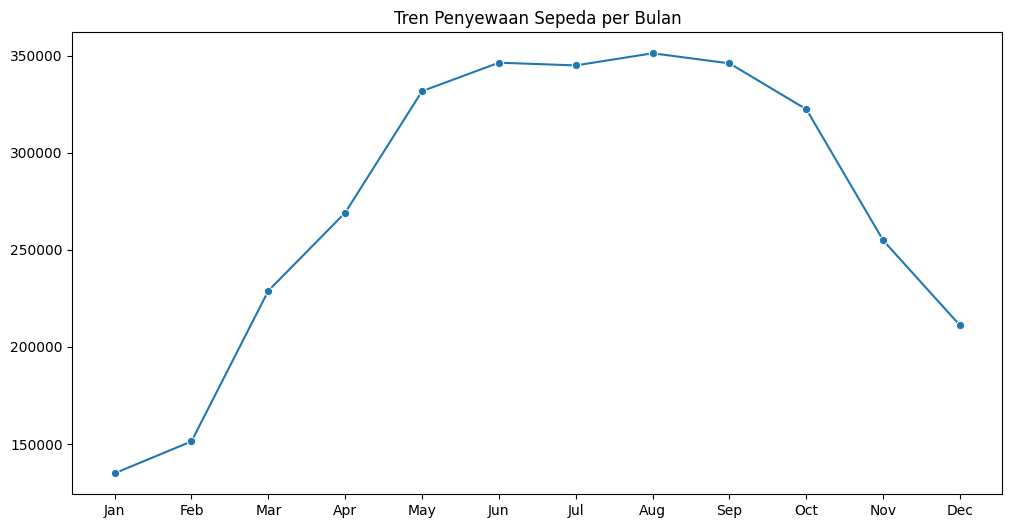

In [91]:
monthly_rentals = day.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_rentals, marker='o')
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('')
plt.ylabel('')
plt.xticks(monthly_rentals['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Pertanyaan 2:

<ipython-input-92-86efefb99a81>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit',
<ipython-input-92-86efefb99a81>:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='weathersit',


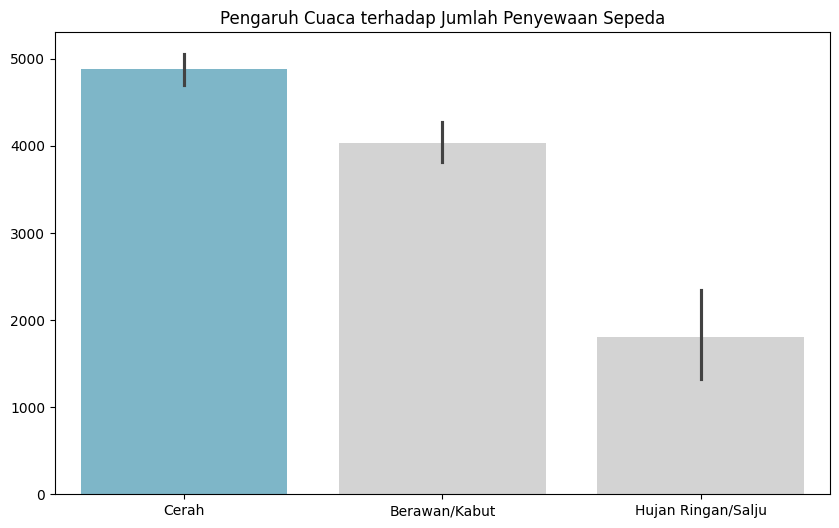

In [92]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit',
            y='cnt',
            data=day.sort_values(by="weathersit", ascending=False),
            palette=colors)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel(None)
plt.ylabel(None)
# Menyesuaikan label sumbu x untuk 'weathersit'
plt.xticks([0, 1, 2], ['Cerah', 'Berawan/Kabut', 'Hujan Ringan/Salju'])
plt.show()

### Pertanyaan 3:

<ipython-input-93-3918c2e267a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday',


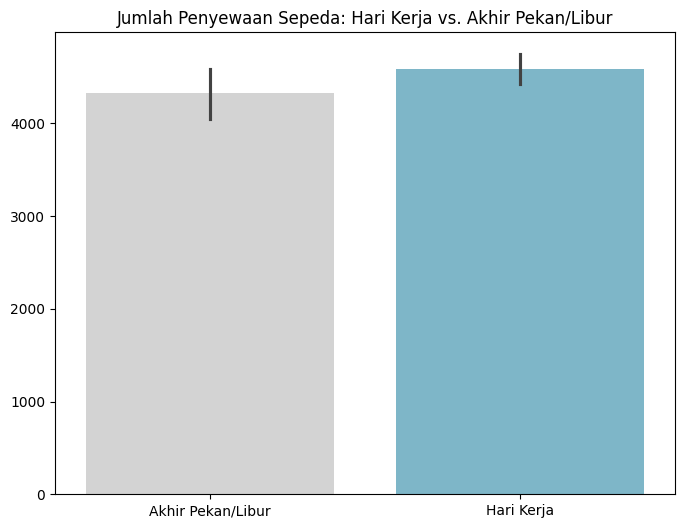

In [93]:
colors = ["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(8, 6))
sns.barplot(x='workingday',
            y='cnt',
            data=day.sort_values(by="workingday", ascending=False),
            palette=colors) # workingday: 1=hari kerja, 0=akhir pekan/libur
plt.title('Jumlah Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan/Libur')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([0, 1], ['Akhir Pekan/Libur', 'Hari Kerja'])
plt.show()

### Pertanyaan 4:

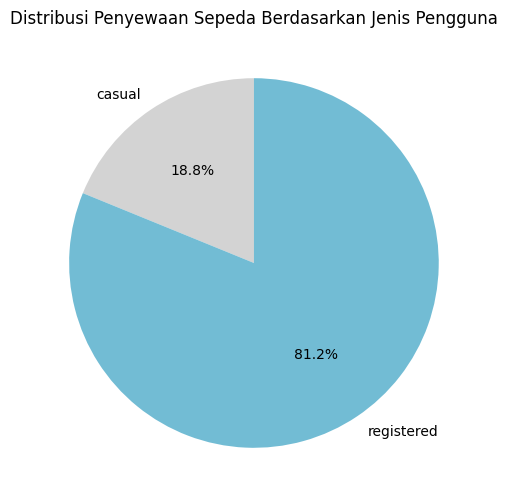

In [94]:
user_counts = day[['casual', 'registered']].sum()
plt.figure(figsize=(6, 6))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=90, colors=["#D3D3D3", "#72BCD4"])  # Added colors
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Jenis Pengguna')
plt.show()

### Pertanyaan 5:

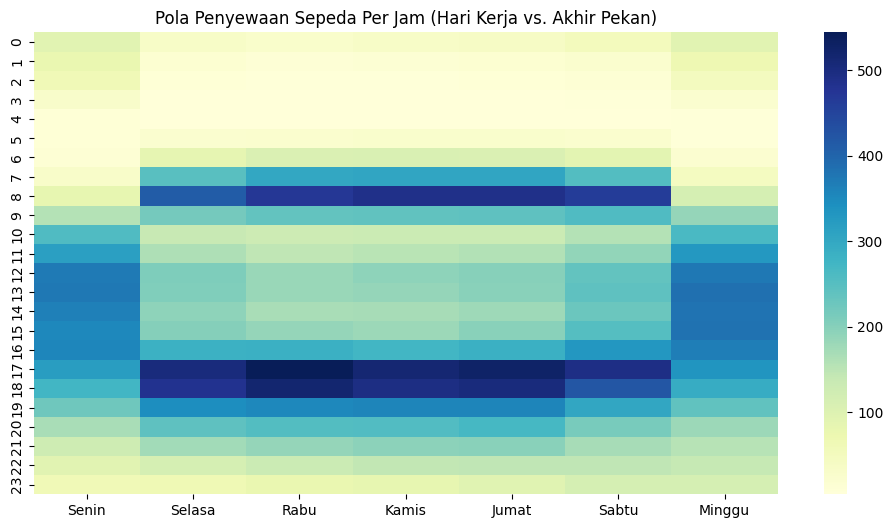

In [95]:
hourly_rentals = hour.pivot_table(values='cnt', index='hr', columns='weekday')
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_rentals, cmap='YlGnBu', annot=False)  # Changed colormap to 'YlGnBu' and removed annotations
plt.title('Pola Penyewaan Sepeda Per Jam (Hari Kerja vs. Akhir Pekan)')
plt.xlabel(None)
plt.ylabel(None)

# Mengubah label hari menjadi Senin-Minggu
weekday_labels = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
plt.xticks(np.arange(len(weekday_labels)) + 0.5, weekday_labels)

plt.show()

### Pertanyaan 6:

<ipython-input-96-cb1880ac89a2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kelompok_penyewaan',


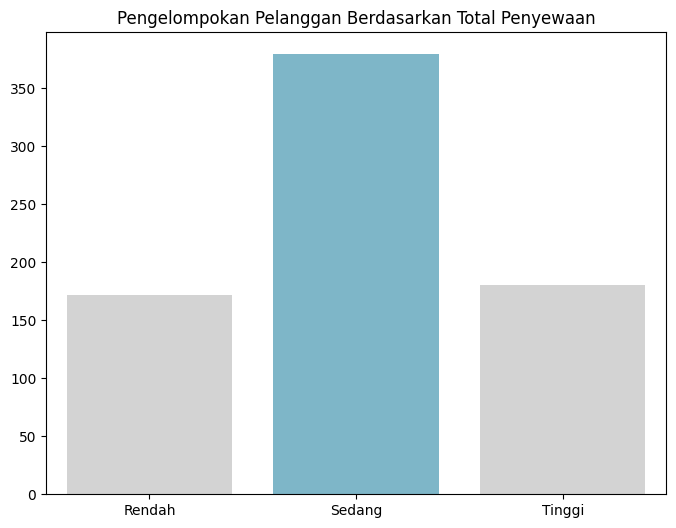

In [96]:
# Tentukan batas baru untuk pengelompokan
batas_rendah = 0
batas_sedang = 3000  # Diturunkan dari 5000
batas_tinggi = 6000  # Diturunkan dari 10000

# Buat kolom baru untuk kelompok (jika belum ada)
day['kelompok_penyewaan'] = pd.cut(day['cnt'],
                                   bins=[batas_rendah, batas_sedang, batas_tinggi, float('inf')],
                                   labels=['Rendah', 'Sedang', 'Tinggi'])

# Visualisasi dengan bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='kelompok_penyewaan',
              data=day.sort_values(by="workingday", ascending=False),
              palette= ["#D3D3D3", "#72BCD4", "#D3D3D3"])
plt.title('Pengelompokan Pelanggan Berdasarkan Total Penyewaan')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Conclusion

####Pertanyaan 1

Tren penyewaan sepeda menunjukkan pola musiman yang jelas, dengan puncak permintaan terjadi selama musim panas dan gugur (Juni-September). Permintaan secara bertahap meningkat dari bulan Maret hingga mencapai puncaknya di bulan-bulan tersebut, sebelum akhirnya menurun drastis di bulan-bulan berikutnya. Periode dengan permintaan terendah adalah selama musim dingin dan awal musim semi, yaitu November hingga Maret. Hal ini kemungkinan besar dipengaruhi oleh cuaca dingin, curah hujan yang lebih tinggi, dan berkurangnya aktivitas luar ruangan selama periode tersebut. Faktor-faktor seperti cuaca yang lebih hangat, liburan, dan peningkatan aktivitas luar ruangan kemungkinan besar mendorong peningkatan permintaan selama musim panas dan gugur. Berdasarkan tren ini, direkomendasikan bagi perusahaan penyewaan sepeda untuk meningkatkan kapasitas armada mereka selama periode puncak (Juni-September), menerapkan strategi pemasaran yang ditargetkan untuk menarik pengguna selama musim semi (November-Maret), dan menawarkan promosi atau penawaran khusus untuk meningkatkan permintaan selama periode tersebut. Perawatan dan pemeliharaan sepeda juga harus diprioritaskan untuk memastikan ketersediaan dan keamanan sepeda selama periode puncak permintaan

####Pertanyaan 2

Kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Penyewaan tertinggi terjadi pada saat cuaca cerah (cerah, beberapa awan, sebagian berawan), dan menurun drastis pada saat kondisi cuaca memburuk. Saat cuaca berawan atau berkabut, terjadi penurunan jumlah penyewaan, meskipun tidak sedrastis saat hujan atau salju. Pada kondisi hujan ringan atau salju, jumlah penyewaan lebih rendah lagi, dan mencapai titik terendah saat hujan lebat atau salju turun. Hal ini menunjukkan bahwa orang-orang cenderung menghindari bersepeda saat cuaca buruk, terutama saat hujan atau salju. Oleh karena itu, perusahaan penyewaan sepeda perlu mengantisipasi penurunan permintaan selama periode cuaca buruk dan mungkin mempertimbangkan untuk menawarkan promosi atau penawaran khusus untuk menarik pengguna selama periode tersebut.

####Pertanyaan 3

Terdapat perbedaan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan/libur. Jumlah sewa sepeda sedikit lebih tinggi pada hari kerja dibandingkan dengan akhir pekan/libur. Hal ini menunjukkan bahwa layanan penyewaan sepeda tidak hanya dimanfaatkan untuk kegiatan rekreasi di akhir pekan, tetapi juga digunakan untuk aktivitas sehari-hari, seperti perjalanan ke tempat kerja atau sekolah, pada hari kerja. Meskipun demikian, perbedaan jumlah penyewaan antara kedua tipe hari tidak terlalu signifikan, menunjukkan bahwa layanan ini cukup populer di kalangan pengguna baik pada hari kerja maupun akhir pekan. Perusahaan penyewaan sepeda dapat mempertimbangkan untuk menawarkan promosi atau paket khusus untuk menarik lebih banyak pengguna di akhir pekan, sehingga dapat mengoptimalkan penggunaan armada sepeda mereka.

####Pertanyaan 4

Terdapat perbedaan yang signifikan dalam jumlah penyewaan sepeda antara pengguna casual dan registered. Sebagian besar penyewaan sepeda dilakukan oleh pengguna registered, menunjukkan bahwa layanan ini lebih banyak digunakan oleh orang-orang yang telah terdaftar sebagai anggota. Pengguna casual hanya menyumbang sebagian kecil dari total penyewaan. Hal ini dapat mengindikasikan bahwa layanan penyewaan sepeda lebih diminati oleh pengguna yang rutin menggunakannya, seperti untuk perjalanan komuter atau aktivitas sehari-hari lainnya. Perusahaan penyewaan sepeda dapat mempertimbangkan strategi untuk meningkatkan jumlah pengguna casual, misalnya dengan menawarkan promosi atau paket khusus untuk penggunaan jangka pendek atau kegiatan rekreasi.



####Pertanyaan 5

Pola penyewaan sepeda per jam menunjukkan perbedaan yang jelas antara hari kerja dan akhir pekan. Pada hari kerja (Senin-Jumat), terdapat dua puncak utama penyewaan, yaitu pada jam-jam berangkat kerja (sekitar pukul 7-9 pagi) dan jam-jam pulang kerja (sekitar pukul 17-19 sore). Hal ini menunjukkan bahwa banyak pengguna yang menggunakan sepeda untuk perjalanan komuter. Di sisi lain, pola penyewaan pada akhir pekan (Sabtu-Minggu) lebih tersebar sepanjang hari, dengan puncak penyewaan yang lebih landai di siang hari (sekitar pukul 10-16). Pola ini menunjukkan bahwa sepeda lebih banyak digunakan untuk kegiatan rekreasi atau perjalanan santai di akhir pekan. Secara keseluruhan, heatmap menunjukkan bahwa layanan penyewaan sepeda dimanfaatkan untuk berbagai keperluan, baik untuk aktivitas sehari-hari maupun kegiatan rekreasi, dengan pola penggunaan yang berbeda antara hari kerja dan akhir pekan.


####Pertanyaan 6

Visualisasi pengelompokan pelanggan berdasarkan total penyewaan menunjukkan bahwa kelompok "Sedang" memiliki jumlah pelanggan terbanyak, yang berarti sebagian besar pelanggan melakukan penyewaan dalam jumlah yang relatif sedang. Kelompok "Tinggi" berada di urutan kedua, menunjukkan adanya segmen pelanggan yang melakukan penyewaan dalam jumlah yang cukup tinggi. Sementara itu, kelompok "Rendah" memiliki jumlah pelanggan paling sedikit, yang mengindikasikan bahwa hanya sebagian kecil pelanggan yang melakukan penyewaan dalam jumlah yang rendah. Distribusi ini menunjukkan bahwa layanan penyewaan sepeda cukup populer di kalangan pelanggan yang melakukan penyewaan dalam jumlah sedang hingga tinggi. Informasi ini dapat digunakan oleh perusahaan penyewaan sepeda untuk mengoptimalkan strategi pemasaran dan penawaran layanan mereka, dengan fokus pada kebutuhan dan preferensi pelanggan di kelompok "Sedang" dan "Tinggi".